In [2]:
import os # 운영체제관련 조작 라이브러리
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split # 검증데이터 쪼개기

In [31]:
train_cats_dir = "./data/cats_and_dogs_filtered/train/cats/" # 훈련용 고양이
train_dogs_dir = "./data/cats_and_dogs_filtered/train/dogs/" # 훈련용 개
test_cats_dir = "./data/cats_and_dogs_filtered/test/cats/" # 평가용 고양이
test_dogs_dir = "./data/cats_and_dogs_filtered/test/dogs/" # 평가용 개

In [32]:
# 특정 폴더 밑에 있는 파일/폴더 이름을 가져오는 함수
train_cats_fnames = os.listdir(train_cats_dir) # 훈련용 고양이
train_cats_fnames

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.101.jpg',
 'cat.102.jpg',
 'cat.103.jpg',
 'cat.104.jpg',
 'cat.105.jpg',
 'cat.106.jpg',
 'cat.107.jpg',
 'cat.108.jpg',
 'cat.109.jpg',
 'cat.11.jpg',
 'cat.110.jpg',
 'cat.111.jpg',
 'cat.112.jpg',
 'cat.113.jpg',
 'cat.114.jpg',
 'cat.115.jpg',
 'cat.116.jpg',
 'cat.117.jpg',
 'cat.118.jpg',
 'cat.119.jpg',
 'cat.12.jpg',
 'cat.120.jpg',
 'cat.121.jpg',
 'cat.122.jpg',
 'cat.123.jpg',
 'cat.124.jpg',
 'cat.125.jpg',
 'cat.126.jpg',
 'cat.127.jpg',
 'cat.128.jpg',
 'cat.129.jpg',
 'cat.13.jpg',
 'cat.130.jpg',
 'cat.131.jpg',
 'cat.132.jpg',
 'cat.133.jpg',
 'cat.134.jpg',
 'cat.135.jpg',
 'cat.136.jpg',
 'cat.137.jpg',
 'cat.138.jpg',
 'cat.139.jpg',
 'cat.14.jpg',
 'cat.140.jpg',
 'cat.141.jpg',
 'cat.142.jpg',
 'cat.143.jpg',
 'cat.144.jpg',
 'cat.145.jpg',
 'cat.146.jpg',
 'cat.147.jpg',
 'cat.148.jpg',
 'cat.149.jpg',
 'cat.15.jpg',
 'cat.150.jpg',
 'cat.151.jpg',
 'cat.152.jpg',
 'cat.153.jpg',
 'cat.154.jpg',
 '

In [33]:
train_dogs_fnames = os.listdir(train_dogs_dir) # 훈련용 개
train_dogs_fnames

['dog.0.jpg',
 'dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.101.jpg',
 'dog.102.jpg',
 'dog.103.jpg',
 'dog.104.jpg',
 'dog.105.jpg',
 'dog.106.jpg',
 'dog.107.jpg',
 'dog.108.jpg',
 'dog.109.jpg',
 'dog.11.jpg',
 'dog.110.jpg',
 'dog.111.jpg',
 'dog.112.jpg',
 'dog.113.jpg',
 'dog.114.jpg',
 'dog.115.jpg',
 'dog.116.jpg',
 'dog.117.jpg',
 'dog.118.jpg',
 'dog.119.jpg',
 'dog.12.jpg',
 'dog.120.jpg',
 'dog.121.jpg',
 'dog.122.jpg',
 'dog.123.jpg',
 'dog.124.jpg',
 'dog.125.jpg',
 'dog.126.jpg',
 'dog.127.jpg',
 'dog.128.jpg',
 'dog.129.jpg',
 'dog.13.jpg',
 'dog.130.jpg',
 'dog.131.jpg',
 'dog.132.jpg',
 'dog.133.jpg',
 'dog.134.jpg',
 'dog.135.jpg',
 'dog.136.jpg',
 'dog.137.jpg',
 'dog.138.jpg',
 'dog.139.jpg',
 'dog.14.jpg',
 'dog.140.jpg',
 'dog.141.jpg',
 'dog.142.jpg',
 'dog.143.jpg',
 'dog.144.jpg',
 'dog.145.jpg',
 'dog.146.jpg',
 'dog.147.jpg',
 'dog.148.jpg',
 'dog.149.jpg',
 'dog.15.jpg',
 'dog.150.jpg',
 'dog.151.jpg',
 'dog.152.jpg',
 'dog.153.jpg',
 'dog.154.jpg',
 '

In [34]:
test_cats_fnames = os.listdir(test_cats_dir) # 평가용 고양이
test_dogs_fnames = os.listdir(test_dogs_dir) # 평가용 개

In [35]:
# 사진의 전체 경로 만들기
path = train_cats_dir + train_cats_fnames[0]
path

'./data/cats_and_dogs_filtered/train/cats/cat.0.jpg'

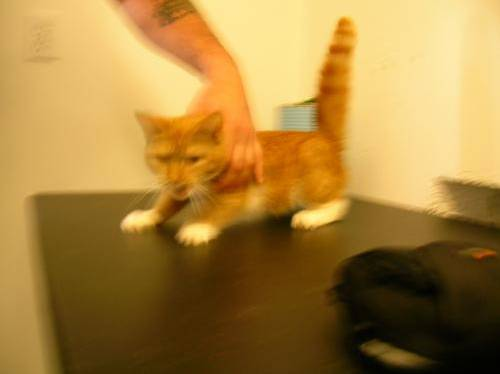

In [36]:
Image.open(path)

In [37]:
# 전체 사진 불러오는 함수
def load_images ( folder_path, file_names, img_size) :
    images = [] # 불러올 사진을 담을 리스트
    
    for i in range(len(file_names)) :
        path = folder_path + file_names[i] # 전체 풀 경로로 사진 생성
        open_image = Image.open(path).resize(img_size) # 반복문으로 생성되는 사진 경로를 찾아서 이미지를 연다, 열린 사진을 리사이징
        images.append(np.array(open_image)) # 오픈된 사진을 numpy 배열로 변경 후 리스트에 추가
        
    return np.array(images)

In [38]:
# 함수 사용하기
X_train_dogs = load_images(train_dogs_dir, train_dogs_fnames, (224,224))
X_train_cats = load_images(train_cats_dir, train_cats_fnames, (224,224))
X_test_dogs = load_images(test_dogs_dir, test_dogs_fnames, (224,224))
X_test_cats = load_images(test_cats_dir, test_cats_fnames, (224,224))

In [39]:
print(X_train_dogs.shape)
print(X_train_cats.shape)
print(X_test_dogs.shape)
print(X_test_cats.shape)

(1000, 224, 224, 3)
(1000, 224, 224, 3)
(500, 224, 224, 3)
(500, 224, 224, 3)


### 데이터 병합

In [40]:
X_train = np.concatenate((X_train_cats, X_train_dogs))
X_test = np.concatenate((X_test_cats, X_test_dogs))

### 라벨링 (고양이 : 0, 개 : 1)

In [41]:
[0,1] * 3

[0, 1, 0, 1, 0, 1]

In [42]:
[1,1] + [2,2]

[1, 1, 2, 2]

In [44]:
y_train = np.array([0] * 1000 + [1] * 1000) # 0이 천개, 1이 천개가 들어있는 리스트가 만들어진다.
y_test = np.array([0] * 500 + [1] * 500) #t est 데이터는 개,고양이 각각 500개니까.

### NPZ 형태로 저장 (numpy zip)

In [45]:
 # 천장의 데이터가 75% 대 25%로 훈련용 데이터와 검증용 데이터로 분류된다.
# 뒤섞여서 샘플링 - 랜덤 샘플링
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [46]:
X_train.shape, X_val.shape

((1500, 224, 224, 3), (500, 224, 224, 3))

In [47]:
y_train.shape, y_val.shape

((1500,), (500,))

In [49]:
 # numpy 압축 파일을 만드는 함수
np.savez_compressed('./data/cat_dog.npz',
                    X_train = X_train,
                    X_val = X_val,
                    X_test = X_test,
                    y_train = y_train,
                    y_val = y_val,
                    y_test = y_test
                    )